## Step 1: Load the Wikipedia GLoVE Word2Vec.

In [ ]:
import numpy as np
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip -d glove_6B

--2024-03-21 19:18:40--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-03-21 19:18:40--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-03-21 19:18:40--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

## Step 2: Show how similar are these words:

In [ ]:
glove_input_file = '/content/glove_6B/glove.6B.50d.txt'
word2vec_output_file = glove_input_file + '.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

word_pairs = [
    ('man', 'woman'),
    ('chair', 'throne'),
    ('water', 'baby'),
]

# Calculate and print the similarities
for word1, word2 in word_pairs:
    similarity = model.similarity(word1, word2)
    print(f"Similarity between '{word1}' and '{word2}': {similarity}")

Similarity between 'man' and 'woman': 0.8860337734222412
Similarity between 'chair' and 'throne': 0.27968090772628784
Similarity between 'water' and 'baby': 0.40810367465019226


## Step 3: Using these provide analogies for the following:

In [ ]:
# Analogy 1: _____ is to King as Woman is to Man
analogy_1 = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
answer_1 = analogy_1[0][0]

# Analogy 2: _____ is to Princess as Man is to Woman
analogy_2 = model.most_similar(positive=['man', 'princess'], negative=['woman'], topn=1)
answer_2 = analogy_2[0][0]

# Analogy 3: _____ is to a woman as a child is to an adult
analogy_3 = model.most_similar(positive=['child', 'woman'], negative=['adult'], topn=1)
answer_3 = analogy_3[0][0]

print(f'"{answer_1}" is to King as Woman is to Man.')
print(f'"{answer_2}" is to Princess as Man is to Woman.')
print(f'"{answer_3}" is to a Woman as a Child is to an Adult.')

"queen" is to King as Woman is to Man.
"prince" is to Princess as Man is to Woman.
"mother" is to a Woman as a Child is to an Adult.


## Step 4: Apply Naive-Bayes Classifier on the Spam-Ham dataset shown in the demo.

**Spam SMS detection**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install scikit-plot

In [ ]:
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
#from scipy.sparse import csr_matrix
import scikitplot as skplt
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.stem import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
stemmer = PorterStemmer()
#from wordcloud import WordCloud
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Creating emoticon list**

In [ ]:
emotions_list = [":)", ":(", ":p", ":D", "-_-", ":o"]

**Filtering SMS based on character length**

In [ ]:
def char_flag(l):
    if l <= 40:
        return 1
    elif l <= 60:
        return 2
    elif l <= 80:
        return 3
    elif l <= 120:
        return 4
    elif l <= 160:
        return 5
    else:
        return 6

**Removing stopwords**

In [ ]:
stop_words = []
def text_process(mess):
    no_punct = re.sub('[^A-Za-z ]+', '', mess.lower())
    return np.array([stemmer.stem(word) for word in no_punct.split() if word not in stop_words])

**Data Preprocessing**

In [ ]:
def preprocessing_text():
    for d, ln in zip(messages_data, token_4):
        token_1.append(d)
        token_2.append(d.count('$'))
        x =re.sub('[^0-9 ]+', '', d.lower())
        token_3.append(len(x))
        token_5.append(char_flag(ln))
        if (re.sub(r'[^://@]', '', d.lower())) is not '':
            token_6.append(1)
        else:
            token_6.append(0)
        token_7.append(len(x.split()))
        for emoji in emotions_list:
            if(re.search(re.escape(emoji), d)):
                token_8.append(1)
            else:
                token_8.append(0)
    return np.array(
        [np.array([token_1[i], token_2[i], token_3[i], token_4[i], token_5[i], token_6[i],
                   token_7[i],token_8[i]], dtype=object) for i in
         range(len(messages_data))])

**Data conversion to vector form**

In [ ]:
def data_mapper():
    data = preprocessing_text()
    labels = ['message','f1','f2','f3','f4','f5','f6','f7']
    df = pd.DataFrame.from_records(data,columns=labels)
    mapper = DataFrameMapper([
    (['f1', 'f2','f3','f4','f5','f6','f7'], None),
    ('message',CountVectorizer(analyzer = text_process,ngram_range=(2, 2)))])
    X=mapper.fit_transform(df)
    return X

**Main Function**

In [ ]:
if __name__ == "__main__":

    messages = pd.read_csv("/content/drive/MyDrive/DATA255/HW7/spam.csv", encoding='latin-1')
    print(messages)
    messages = messages.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
    print(messages)


        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [ ]:
    messages['length'] = messages['v2'].apply(len)
    messages_data = messages['v2']
    messages_labels = messages['v1']
    print(messages)

        v1                                                 v2  length
0      ham  Go until jurong point, crazy.. Available only ...     111
1      ham                      Ok lar... Joking wif u oni...      29
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3      ham  U dun say so early hor... U c already then say...      49
4      ham  Nah I don't think he goes to usf, he lives aro...      61
...    ...                                                ...     ...
5567  spam  This is the 2nd time we have tried 2 contact u...     161
5568   ham              Will Ì_ b going to esplanade fr home?      37
5569   ham  Pity, * was in mood for that. So...any other s...      57
5570   ham  The guy did some bitching but I acted like i'd...     125
5571   ham                         Rofl. Its true to its name      26

[5572 rows x 3 columns]


In [ ]:
    token_1 = []
    token_2 = []
    token_3 = []
    token_4 = messages['length']
    token_5 = []
    token_6 = []
    token_7 = []
    token_8 = []

    freq = pd.Series(' '.join(messages_data).split()).value_counts()
    print(freq)

to           2134
you          1622
I            1466
a            1327
the          1197
             ... 
AOM             1
Box61,M60       1
1ER             1
Ages            1
Rofl.           1
Length: 15585, dtype: int64


In [ ]:
    stop_words = stopwords.words('english')
    print(stop_words)
    stop_words.extend(freq[-9268:].index)
    print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
    mapped_data = data_mapper()

    trainset, testset, trainlabel, testlabel = train_test_split(mapped_data, messages_labels, test_size=0.33, random_state=42)

**Naive Bayes**

Confusion matrix for Naive Bayes: [[1577   10]
 [  19  233]]
Accuracy for Naive Bayes: 0.9842305600870038


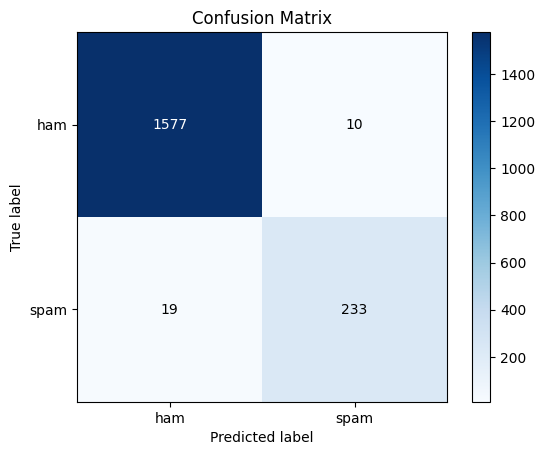

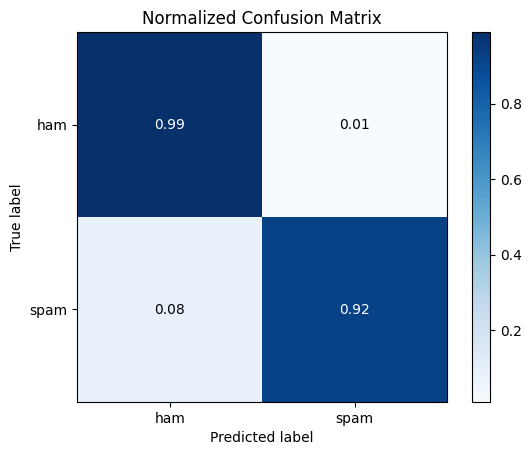

In [ ]:
# Instantiate and train the Naive Bayes classifier
NB = MultinomialNB()
NB.fit(trainset, trainlabel)
predicted_values_nb = NB.predict(testset)

# Accuracy
accuracy_NB = accuracy_score(testlabel, predicted_values_nb)

# 5-fold cross-validation
scores = cross_val_score(NB, trainset, trainlabel, cv=5)

# Confusion matrix
confusion_matrix_NB = confusion_matrix(testlabel, predicted_values_nb, labels=["ham", "spam"])
skplt.metrics.plot_confusion_matrix(testlabel, predicted_values_nb, normalize=False)
skplt.metrics.plot_confusion_matrix(testlabel, predicted_values_nb, normalize=True)

print('Confusion matrix for Naive Bayes:', confusion_matrix_NB)
print(f'Accuracy for Naive Bayes: {accuracy_NB}')
plt.show()

In [ ]:
# Printing the accuracy for the Naive Bayes classifier
print("Accuracy for Naive Bayes: " + str(accuracy_NB))
print('\n')
print('Validation scores for Naive Bayes: ', scores)

Accuracy for Naive Bayes: 0.9842305600870038


Validation scores for Naive Bayes:  [0.98393574 0.9772423  0.98393574 0.98659517 0.97989276]
